In [40]:
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import folium
from IPython.display import HTML


# Enable inline plotting
%matplotlib inline

#### Get all "listings.csv" ( feb, mar, apr)

In [2]:
my_usecols= ['id', 
'zipcode',
'transit',
'bedrooms',
'beds',
'review_scores_rating',
'number_of_reviews',
'neighbourhood',
'name',
'latitude',
'longitude',
'last_review',
'instant_bookable',
'host_since',
'host_response_rate',
'host_identity_verified',
'host_has_profile_pic',
'first_review',
'description',
'city',
'cancellation_policy',
'bathrooms',
'accommodates',
'amenities',
'room_type',
'property_type',
'price',
'availability_365',
'minimum_nights']

location1 = r'../../data/february/listings.csv'
feb_listing = pd.read_csv(location1, usecols=my_usecols)
location2 = r'../../data/march/listings.csv'
mar_listing = pd.read_csv(location2,usecols=my_usecols)
location3 = r'../../data/april/listings.csv'
apr_listing = pd.read_csv(location3,usecols=my_usecols)

feb_listing.insert(loc = len(feb_listing.columns), column='month', value='02_February')
mar_listing.insert(loc = len(mar_listing.columns), column='month', value='03_March')
apr_listing.insert(loc = len(apr_listing.columns), column='month', value='04_April')

In [3]:
all_listings = pd.concat([feb_listing,mar_listing, apr_listing])

all_listings = all_listings.drop_duplicates()
all_listings

,id,name,description,transit,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighbourhood,city,...,price,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,month
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,$71.00,1,294,17,2011-05-20,2019-01-12,96.0,t,strict_14_with_grace_period,02_February
1,10988,"75m2, 2-br, metro, wi-fi, cable TV",Athens Furnished Apartment No4 is 2-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,$82.00,1,0,31,2012-10-21,2017-11-23,92.0,t,strict_14_with_grace_period,02_February
2,10990,"50m2, Metro, WI-FI, cableTV, more",Athens Furnished Apartment No3 is 1-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,$47.00,1,282,27,2012-09-06,2019-02-01,97.0,t,strict_14_with_grace_period,02_February
3,10993,"Studio, metro, cable tv, wi-fi, etc",The Studio is an -excellent located -close t...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,$37.00,1,286,42,2012-09-24,2019-02-02,97.0,t,strict_14_with_grace_period,02_February
4,10995,"47m2, close to metro,cable TV,wi-fi",AQA No2 is 1-bedroom apartment (47m2) -excell...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,$47.00,2,308,16,2010-07-08,2019-01-11,95.0,t,strict_14_with_grace_period,02_February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9656,33819692,Lysicrates Monument - Athens 33,"""Athens 33"" is a newly renovated building in N...",NaN,2014-05-09,100%,t,t,NaN,Athina,...,$90.00,2,260,0,NaN,NaN,NaN,t,flexible,04_April
9657,33820145,Bright and Stylish Exarchia apartment,"Newly renovated, this two bedroom apartment is...",Omonia metro station is 600 m away from the ap...,2019-04-12,NaN,t,f,NaN,Athina,...,$50.00,2,263,0,NaN,NaN,NaN,t,moderate,04_April
9658,33821757,Athens21,Athens 21 is centrally located right next to M...,NaN,2019-04-12,NaN,t,f,NaN,Athina,...,$200.00,1,86,0,NaN,NaN,NaN,t,flexible,04_April
9659,33821833,Tower of Winds,"""Athens 33"" is a newly renovated building in N...",NaN,2014-05-09,100%,t,t,NaN,Athens,...,$90.00,2,260,0,NaN,NaN,NaN,t,flexible,04_April


##### To use the 'price' field, we have to convert it to numeric

In [30]:
all_listings = all_listings.replace(to_replace = {'price':'\$'}, value='', regex=True)
all_listings = all_listings.replace(to_replace = {'price':'\,'}, value='', regex=True)
all_listings

,id,name,description,transit,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighbourhood,city,...,price,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,month
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,71.0,1,294,17,2011-05-20,2019-01-12,96.0,t,strict_14_with_grace_period,02_February
1,10988,"75m2, 2-br, metro, wi-fi, cable TV",Athens Furnished Apartment No4 is 2-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,82.0,1,0,31,2012-10-21,2017-11-23,92.0,t,strict_14_with_grace_period,02_February
2,10990,"50m2, Metro, WI-FI, cableTV, more",Athens Furnished Apartment No3 is 1-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,47.0,1,282,27,2012-09-06,2019-02-01,97.0,t,strict_14_with_grace_period,02_February
3,10993,"Studio, metro, cable tv, wi-fi, etc",The Studio is an -excellent located -close t...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,37.0,1,286,42,2012-09-24,2019-02-02,97.0,t,strict_14_with_grace_period,02_February
4,10995,"47m2, close to metro,cable TV,wi-fi",AQA No2 is 1-bedroom apartment (47m2) -excell...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,47.0,2,308,16,2010-07-08,2019-01-11,95.0,t,strict_14_with_grace_period,02_February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9656,33819692,Lysicrates Monument - Athens 33,"""Athens 33"" is a newly renovated building in N...",NaN,2014-05-09,100%,t,t,NaN,Athina,...,90.0,2,260,0,NaN,NaN,NaN,t,flexible,04_April
9657,33820145,Bright and Stylish Exarchia apartment,"Newly renovated, this two bedroom apartment is...",Omonia metro station is 600 m away from the ap...,2019-04-12,NaN,t,f,NaN,Athina,...,50.0,2,263,0,NaN,NaN,NaN,t,moderate,04_April
9658,33821757,Athens21,Athens 21 is centrally located right next to M...,NaN,2019-04-12,NaN,t,f,NaN,Athina,...,200.0,1,86,0,NaN,NaN,NaN,t,flexible,04_April
9659,33821833,Tower of Winds,"""Athens 33"" is a newly renovated building in N...",NaN,2014-05-09,100%,t,t,NaN,Athens,...,90.0,2,260,0,NaN,NaN,NaN,t,flexible,04_April


In [5]:
all_listings = all_listings.astype({'price':'float64'})
all_listings

,id,name,description,transit,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighbourhood,city,...,price,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,month
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,71.0,1,294,17,2011-05-20,2019-01-12,96.0,t,strict_14_with_grace_period,02_February
1,10988,"75m2, 2-br, metro, wi-fi, cable TV",Athens Furnished Apartment No4 is 2-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,82.0,1,0,31,2012-10-21,2017-11-23,92.0,t,strict_14_with_grace_period,02_February
2,10990,"50m2, Metro, WI-FI, cableTV, more",Athens Furnished Apartment No3 is 1-bedroom ap...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,47.0,1,282,27,2012-09-06,2019-02-01,97.0,t,strict_14_with_grace_period,02_February
3,10993,"Studio, metro, cable tv, wi-fi, etc",The Studio is an -excellent located -close t...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,37.0,1,286,42,2012-09-24,2019-02-02,97.0,t,strict_14_with_grace_period,02_February
4,10995,"47m2, close to metro,cable TV,wi-fi",AQA No2 is 1-bedroom apartment (47m2) -excell...,Note: 5-day ticket for all the public transpor...,2009-09-08,100%,t,t,Ambelokipi,Athens,...,47.0,2,308,16,2010-07-08,2019-01-11,95.0,t,strict_14_with_grace_period,02_February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9656,33819692,Lysicrates Monument - Athens 33,"""Athens 33"" is a newly renovated building in N...",NaN,2014-05-09,100%,t,t,NaN,Athina,...,90.0,2,260,0,NaN,NaN,NaN,t,flexible,04_April
9657,33820145,Bright and Stylish Exarchia apartment,"Newly renovated, this two bedroom apartment is...",Omonia metro station is 600 m away from the ap...,2019-04-12,NaN,t,f,NaN,Athina,...,50.0,2,263,0,NaN,NaN,NaN,t,moderate,04_April
9658,33821757,Athens21,Athens 21 is centrally located right next to M...,NaN,2019-04-12,NaN,t,f,NaN,Athina,...,200.0,1,86,0,NaN,NaN,NaN,t,flexible,04_April
9659,33821833,Tower of Winds,"""Athens 33"" is a newly renovated building in N...",NaN,2014-05-09,100%,t,t,NaN,Athens,...,90.0,2,260,0,NaN,NaN,NaN,t,flexible,04_April


# Task 1: Data Exploration

### Query 1.1

In [6]:
q1 = all_listings.groupby(['room_type']).count()
q1 = q1.sort_values(by='id', ascending=False)

In [29]:
q1.head(n=1).filter(items=[])

""
room_type
Entire home/apt


### Query 1.2

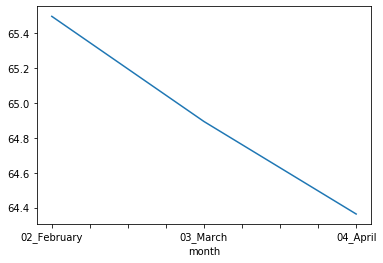

In [8]:
all_listings.groupby(['month'])['price'].mean().plot()

### Query 1.3

In [22]:
q3 = all_listings.groupby(['neighbourhood']).sum()
q3 = q3.sort_values('number_of_reviews', ascending = False)
q3.head(5).filter(items=['number_of_reviews'])

,number_of_reviews
neighbourhood,
Plaka,132361
Koukaki,90357
Neos Kosmos,83348
Psyri,54353
Metaxourgeio,44792


### Query 1.4

In [28]:
q4 = all_listings.groupby(['neighbourhood']).count()
q4 = q4.sort_values(['id'], ascending = False)
q4.head(1).filter(items=[])

""
neighbourhood
Plaka


### Query 1.5

##### By neighbourhood

In [21]:
q5_neigh = all_listings.groupby(['neighbourhood']).count()
q5_neigh = q5_neigh.rename(columns={'id': 'count'})
q5_neigh.filter(items=['neighbourhood','count'])

,count
neighbourhood,
Agios Loukas,209
Agios Nikolaos,611
Akadimia Platonos,114
Ambelokipi,1482
Attiki,758
Exarcheia,1330
Gazi,282
Goudi,87
Ilisia,502


##### By month

In [24]:
q5_month = all_listings.groupby(['month']).count()
q5_month = q5_month.rename(columns={'id': 'count'})
q5_month.filter(items=['count'])

,count
month,
02_February,9100
03_March,9361
04_April,9661


### Query 1.6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4f0a9e310>]],
      dtype=object)

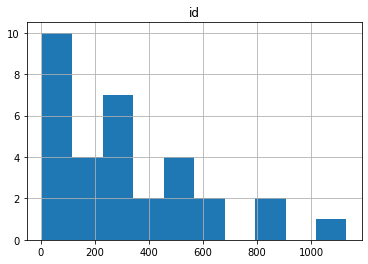

In [13]:
q6 = all_listings.drop_duplicates(subset='id').groupby(['neighbourhood']).count()
q6.hist(column = 'id')

### Query 1.7

In [16]:
q7 = all_listings.groupby(['neighbourhood','room_type']).count().sort_values('neighbourhood').groupby(level=0).head(1)
q7.filter(items='id')

,
neighbourhood,room_type
Agios Loukas,Entire home/apt
Agios Nikolaos,Entire home/apt
Akadimia Platonos,Entire home/apt
Ambelokipi,Shared room
Attiki,Entire home/apt
Exarcheia,Entire home/apt
Gazi,Entire home/apt
Goudi,Private room
Ilisia,Entire home/apt


### Query 1.8

In [25]:
q8 = all_listings.groupby(['room_type']).mean()
q8 = q8.sort_values(['price'], ascending=False)
q8.head(1).filter(items=['price'])

,price
room_type,
Private room,80.300031


### Query 1.9

In [36]:
map = folium.Map(location = [37.983810, 23.727539], zoom_start=13)
#map

In [37]:
q9 = all_listings[all_listings.month == '04_April'].filter(items=['name', 'description', 'neighbourhood', 'latitude','longitude', 'room_type', 'price'])
q9 = q9.sample(1000, random_state=30)

for index, row in q9.iterrows():
    pop = row['room_type'] + ' ' + '$' +  str(row['price'])
    folium.Marker([row['latitude'], row['longitude']], popup=pop, tooltip = row['name']).add_to(map)

map

In [38]:
#map.save('april_listings.html')

In [41]:
#HTML(filename='april_listings.html')